In [2]:
import torch
import statistics

device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [3]:
import pandas as pd

train_path = 'E:\учеба\Диплом\Data_1\mtsgrvmgn_trn.csv'
train_data = pd.read_csv(train_path)
train_data.head(3)

,REYX5_1,REYX5_2,REYX5_3,REYX5_4,REYX5_5,REYX5_6,REYX5_7,REYX5_8,REYX5_9,REYX5_10,...,H3_6,H3_7,H3_8,H3_9,H3_10,H3_11,H3_12,H3_13,H3_14,H3_15
0,-0.021830,-0.022091,-0.023217,-0.024061,-0.024793,-0.025011,-0.024841,-0.024436,-0.024106,-0.023762,...,2.28,2.28,2.26,2.20,2.20,2.20,2.28,2.28,2.26,2.20
1,-0.026549,-0.026260,-0.025624,-0.024608,-0.023581,-0.022701,-0.022512,-0.022666,-0.023107,-0.023523,...,2.26,2.24,2.26,2.26,2.22,2.26,2.26,2.24,2.20,2.20
2,-0.026601,-0.026467,-0.026082,-0.025734,-0.026490,-0.027129,-0.027003,-0.026047,-0.025100,-0.024086,...,2.28,2.26,2.26,2.28,2.24,2.22,2.20,2.24,2.24,2.24


In [4]:
train_data.dtypes[:5]

REYX5_1    float64
REYX5_2    float64
REYX5_3    float64
REYX5_4    float64
REYX5_5    float64
dtype: object

In [5]:
la = train_data.drop(train_data.columns[:62], axis=1)
la = la.drop(la.columns[31:62], axis=1)
la = la.drop(la.columns[31:46], axis=1)
#la.columns[46:61]

#pd.concat([train_data.iloc[:, 62:93], train_data.iloc[:, 124:]], axis=1).head(3)
train_data.drop(train_data.iloc[:, 93:124], axis=1)

,REYX5_1,REYX5_2,REYX5_3,REYX5_4,REYX5_5,REYX5_6,REYX5_7,REYX5_8,REYX5_9,REYX5_10,...,H3_6,H3_7,H3_8,H3_9,H3_10,H3_11,H3_12,H3_13,H3_14,H3_15
0,-0.021830,-0.022091,-0.023217,-0.024061,-0.024793,-0.025011,-0.024841,-0.024436,-0.024106,-0.023762,...,2.28,2.28,2.26,2.20,2.20,2.20,2.28,2.28,2.26,2.20
1,-0.026549,-0.026260,-0.025624,-0.024608,-0.023581,-0.022701,-0.022512,-0.022666,-0.023107,-0.023523,...,2.26,2.24,2.26,2.26,2.22,2.26,2.26,2.24,2.20,2.20
2,-0.026601,-0.026467,-0.026082,-0.025734,-0.026490,-0.027129,-0.027003,-0.026047,-0.025100,-0.024086,...,2.28,2.26,2.26,2.28,2.24,2.22,2.20,2.24,2.24,2.24
3,-0.025399,-0.025498,-0.025850,-0.026132,-0.026361,-0.026477,-0.026468,-0.026424,-0.026492,-0.026233,...,2.24,2.20,2.28,2.26,2.20,2.26,2.22,2.20,2.28,2.26
4,-0.025989,-0.025878,-0.025485,-0.025054,-0.025265,-0.025427,-0.024987,-0.024082,-0.023703,-0.023614,...,2.28,2.28,2.22,2.20,2.24,2.22,2.20,2.24,2.26,2.26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20995,-0.022011,-0.022516,-0.023482,-0.024256,-0.024894,-0.025021,-0.024626,-0.023904,-0.023579,-0.023708,...,2.28,2.24,2.26,2.22,2.26,2.20,2.22,2.26,2.26,2.24
20996,-0.022753,-0.023719,-0.025585,-0.026531,-0.026159,-0.025076,-0.025118,-0.025259,-0.025110,-0.024550,...,2.22,2.22,2.22,2.20,2.22,2.24,2.22,2.22,2.28,2.24
20997,-0.023837,-0.023682,-0.023464,-0.023381,-0.023868,-0.024479,-0.025030,-0.025496,-0.025837,-0.025838,...,2.28,2.20,2.26,2.26,2.28,2.20,2.20,2.28,2.26,2.26
20998,-0.022903,-0.023091,-0.023489,-0.024362,-0.025999,-0.026914,-0.026765,-0.026012,-0.026193,-0.026918,...,2.20,2.22,2.22,2.26,2.24,2.28,2.26,2.28,2.24,2.20


In [6]:
train_data.attrs, train_data.empty

({}, False)

In [7]:
null_value_stats = train_data.isnull().sum(axis=0)
null_value_stats[null_value_stats != 0]

Series([], dtype: int64)

In [8]:
# Test data

test_path = 'E:\учеба\Диплом\Data_1\mtsgrvmgn_pro.csv'
test_data = pd.read_csv(test_path)

# Validation data

validation_path = 'E:\учеба\Диплом\Data_1\mtsgrvmgn_tst.csv'
validation_data = pd.read_csv(validation_path)
validation_data.head(2)

,REYX5_1,REYX5_2,REYX5_3,REYX5_4,REYX5_5,REYX5_6,REYX5_7,REYX5_8,REYX5_9,REYX5_10,...,H3_6,H3_7,H3_8,H3_9,H3_10,H3_11,H3_12,H3_13,H3_14,H3_15
0,-0.023830,-0.023770,-0.023618,-0.02342,-0.023614,-0.023788,-0.024027,-0.024397,-0.025130,-0.025704,...,2.22,2.22,2.24,2.26,2.26,2.20,2.20,2.2,2.24,2.20
1,-0.025463,-0.025015,-0.024392,-0.02384,-0.024010,-0.024387,-0.025185,-0.025812,-0.026263,-0.026392,...,2.26,2.22,2.20,2.24,2.26,2.22,2.22,2.2,2.20,2.28


# Data preparation

In [9]:
# DATA PREPARATION

import torch

G_train = pd.concat([train_data.iloc[:, 62:93], train_data.iloc[:, 124:]], axis=1)
G_test = pd.concat([test_data.iloc[:, 62:93], test_data.iloc[:, 124:]], axis=1)
G_valid = pd.concat([validation_data.iloc[:, 62:93], validation_data.iloc[:, 124:]], axis=1)
# G, H1, H2, H3

M_train = train_data.iloc[:, 93:]
M_test = test_data.iloc[:, 93:]
M_valid = validation_data.iloc[:, 93:]
# M, H1, H2, H3

MT_train = pd.concat([train_data.iloc[:, :62], train_data.iloc[:, 124:]], axis=1)
MT_test = pd.concat([test_data.iloc[:, :62], test_data.iloc[:, 124:]], axis=1)
MT_valid = pd.concat([validation_data.iloc[:, :62], validation_data.iloc[:, 124:]], axis=1)
# Re, Im, H1, H2, H3

G_M_train = train_data.iloc[:, 62:]
G_M_test = test_data.iloc[:, 62:]
G_M_valid = validation_data.iloc[:, 62:]
# G, M, H1, H2, H3

G_MT_train = train_data.drop(train_data.iloc[:, 93:124], axis=1)
G_MT_test = test_data.drop(test_data.iloc[:, 93:124], axis=1)
G_MT_valid = validation_data.drop(validation_data.iloc[:, 93:124], axis=1)
# Re, Im, G, H1, H2, H3

M_MT_train = train_data.drop(train_data.iloc[:, 62:93], axis=1)
M_MT_test = test_data.drop(test_data.iloc[:, 62:93], axis=1)
M_MT_valid = validation_data.drop(validation_data.iloc[:, 62:93], axis=1)
# Re, Im, M, H1, H2, H3

G_M_MT_train = train_data
G_M_MT_test = test_data
G_M_MT_valid = validation_data

G_MT_train.iloc[:, 62:93]

,G_76_61,G_76_62,G_76_63,G_76_64,G_76_65,G_76_66,G_76_67,G_76_68,G_76_69,G_76_70,...,G_76_82,G_76_83,G_76_84,G_76_85,G_76_86,G_76_87,G_76_88,G_76_89,G_76_90,G_76_91
0,-7.140,-6.955,-4.864,-2.627,-1.304,0.206,1.498,2.695,3.349,3.748,...,-0.020,-1.712,-2.831,-0.902,1.472,2.744,3.021,1.289,-0.776,-1.867
1,3.320,3.111,2.407,1.667,1.053,0.985,2.448,3.964,4.550,4.532,...,-3.035,-4.874,-6.407,-6.686,-6.509,-5.178,-4.072,-5.997,-8.151,-8.612
2,-3.287,-3.367,-4.547,-5.774,-5.314,-4.888,-6.173,-7.422,-8.397,-9.129,...,-3.951,-5.020,-6.300,-7.252,-7.575,-5.288,-2.712,-1.611,-0.871,-0.480
3,-1.461,-0.907,0.353,1.661,2.392,2.640,1.988,0.748,-1.289,-3.286,...,4.137,3.878,2.958,2.167,1.872,3.042,4.659,5.871,6.897,7.541
4,3.598,3.293,2.059,0.637,-0.090,-0.646,-1.510,-1.861,-0.519,1.030,...,-0.291,-2.144,-3.876,-4.368,-4.478,-3.719,-2.476,-1.236,-0.069,0.449
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20995,-6.419,-6.552,-5.888,-5.176,-4.726,-4.248,-4.642,-4.871,-4.068,-3.149,...,2.143,2.251,1.869,0.179,-1.148,-0.056,1.433,1.648,1.507,1.543
20996,-7.922,-7.927,-6.190,-4.586,-6.531,-8.603,-8.231,-7.528,-6.942,-6.275,...,-6.617,-5.283,-4.161,-4.952,-5.931,-6.043,-5.804,-4.256,-2.641,-2.205
20997,2.537,2.551,2.271,2.118,2.798,3.535,3.745,3.657,3.248,2.847,...,4.745,4.185,3.268,2.182,1.636,2.653,3.442,2.536,1.264,0.570
20998,-6.465,-6.470,-6.691,-6.994,-6.223,-5.563,-6.981,-8.325,-7.884,-7.107,...,-2.805,-3.663,-4.644,-4.737,-4.554,-3.813,-3.145,-3.414,-3.894,-4.162


In [10]:
# CHOSEN LAYER - H1

X_G_train = G_train.iloc[:, :31]
Y_train = G_train.iloc[:, 31:46]

X_G_test = G_test.iloc[:, :31]
Y_test = G_test.iloc[:, 31:46]

X_G_valid = G_valid.iloc[:, :31]
Y_valid = G_valid.iloc[:, 31:46]

X_G_train, y_train = torch.tensor(X_G_train.values).type(torch.float), torch.tensor(Y_train.values).type(torch.float)
X_G_test, y_test = torch.tensor(X_G_test.values).type(torch.float), torch.tensor(Y_test.values).type(torch.float)
X_G_valid, y_valid = torch.tensor(X_G_valid.values).type(torch.float), torch.tensor(Y_valid.values).type(torch.float)


X_M_train = M_train.iloc[:, :31]
X_M_test = M_test.iloc[:, :31]
X_M_valid = M_valid.iloc[:, :31]

X_M_train = torch.tensor(X_M_train.values).type(torch.float)
X_M_test = torch.tensor(X_M_test.values).type(torch.float)
X_M_valid = torch.tensor(X_M_valid.values).type(torch.float)


X_MT_train = MT_train.iloc[:, :62]
X_MT_test = MT_test.iloc[:, :62]
X_MT_valid = MT_valid.iloc[:, :62]

X_MT_train = torch.tensor(X_MT_train.values).type(torch.float)
X_MT_test = torch.tensor(X_MT_test.values).type(torch.float)
X_MT_valid = torch.tensor(X_MT_valid.values).type(torch.float)


X_G_M_train = G_M_train.iloc[:, :62]
X_G_M_test = G_M_test.iloc[:, :62]
X_G_M_valid = G_M_valid.iloc[:, :62]

X_G_M_train = torch.tensor(X_G_M_train.values).type(torch.float)
X_G_M_test = torch.tensor(X_G_M_test.values).type(torch.float)
X_G_M_valid = torch.tensor(X_G_M_valid.values).type(torch.float)


X_G_MT_train = G_MT_train.iloc[:, :93]
X_G_MT_test = G_MT_test.iloc[:, :93]
X_G_MT_valid = G_MT_valid.iloc[:, :93]

X_G_MT_train = torch.tensor(X_G_MT_train.values).type(torch.float)
X_G_MT_test = torch.tensor(X_G_MT_test.values).type(torch.float)
X_G_MT_valid = torch.tensor(X_G_MT_valid.values).type(torch.float)


X_M_MT_train = M_MT_train.iloc[:, :93]
X_M_MT_test = M_MT_test.iloc[:, :93]
X_M_MT_valid = M_MT_valid.iloc[:, :93]

X_M_MT_train = torch.tensor(X_M_MT_train.values).type(torch.float)
X_M_MT_test = torch.tensor(X_M_MT_test.values).type(torch.float)
X_M_MT_valid = torch.tensor(X_M_MT_valid.values).type(torch.float)


X_G_M_MT_train = G_M_MT_train.iloc[:, :124]
X_G_M_MT_test = G_M_MT_test.iloc[:, :124]
X_G_M_MT_valid = G_M_MT_valid.iloc[:, :124]

X_G_M_MT_train = torch.tensor(X_G_M_MT_train.values).type(torch.float)
X_G_M_MT_test = torch.tensor(X_G_M_MT_test.values).type(torch.float)
X_G_M_MT_valid = torch.tensor(X_G_M_MT_valid.values).type(torch.float)


X_G_MT_train.shape

torch.Size([21000, 93])

In [11]:
from torch import nn

class Initial_Model_V0(nn.Module):
    def __init__(self, input_dim, hidden_units, output_dim):
        super().__init__()
        self.fc1 = nn.Linear(in_features=input_dim,
                             out_features=hidden_units)
        self.act1 = nn.Sigmoid()
        self.fc2 = nn.Linear(in_features=hidden_units,
                             out_features=output_dim)
        #self.act2 = nn.Linear(in_features=output_dim,
        #                      out_features=output_dim,
        #                      bias=False)
        
    def forward(self, x):
        x = self.fc1(x)
        x = self.act1(x)
        x = self.fc2(x)
        #x = self.act2(x)
        return x

In [12]:
# НАПИСАТЬ НОРМ КОД, ОБЩИЙ ДЛЯ ВСЕХ КОМБИНАЦИЙ МЕТОДОВ

class G_M_Stacking_Model_V0(nn.Module):
    def __init__(self, init_input_dim, hidden_units, output_dim):
        super().__init__()
        self.initial_layers = nn.Sequential(
            nn.Linear(in_features=init_input_dim,
                      out_features=hidden_units),
            nn.Sigmoid(),
            nn.Linear(in_features=hidden_units,
                      out_features=output_dim)
        )
        self.meta_layers = nn.Sequential(
            nn.Linear(in_features=10,
                      out_features=hidden_units),
            nn.Sigmoid(),
            nn.Linear(in_features=hidden_units,
                      out_features=output_dim)
        )
        
    def forward(self, x_g, x_m):
        res = []
        for net in range(5):
            res.append(self.initial_layers(x_g))
        for net in range(5):
            res.append(self.initial_layers(x_m))
        x = self.meta_layers(torch.cat(res, 1))
        return x

In [13]:
class G_MT_Stacking_Model_V0(nn.Module):
    def __init__(self, init_input_dim, hidden_units, output_dim):
        super().__init__()
        self.initial_layers = nn.Sequential(
            nn.Linear(in_features=init_input_dim,
                      out_features=hidden_units),
            nn.Sigmoid(),
            nn.Linear(in_features=hidden_units,
                      out_features=output_dim)
            
        )
        self.meta_layers = nn.Sequential(
            nn.Linear(in_features=10,
                      out_features=hidden_units),
            nn.Sigmoid(),
            nn.Linear(in_features=hidden_units,
                      out_features=output_dim)
        )
        
    def forward(self, x_g, x_m):
        res = []
        for net in range(5):
            res.append(self.initial_layers(x_g))
        for net in range(5):
            res.append(self.initial_layers(x_m))
        x = self.meta_layers(torch.cat(res, 1))
        return x

In [14]:
class EarlyStopping_V1():
    def __init__(self, patience, min_delta):
        self.patience = patience
        self.min_delta = min_delta
        self.counter = 0
        self.early_stop = False

    def __call__(self, prev_loss, next_loss):
        if (next_loss - prev_loss) >= min_delta:
            self.counter +=1
            if self.counter >= self.patience:  
                self.early_stop = True

In [15]:
class EarlyStopping():
    def __init__(self, patience=5, min_delta=0):
        self.patience = patience
        self.min_delta = min_delta
        self.counter = 0
        self.early_stop = False

    def __call__(self, train_loss, validation_loss):
        if (abs(validation_loss - train_loss)) < self.min_delta:
            self.counter +=1
            if self.counter >= self.patience:  
                self.early_stop = True

In [16]:
loss_fn = torch.nn.MSELoss()

In [17]:
import matplotlib.pyplot as plt

# Initial - G

In [230]:
torch.manual_seed(42)

input_dim = 31
hidden_units = 31
output_dim = 1

num_models = 15
G_models = []

for i in range(num_models):
    G_models.append(Initial_Model_V0(input_dim, hidden_units, output_dim).to(device))

In [232]:
X_G_train, y_train = X_G_train.to(device), y_train.to(device)
X_G_test, y_test = X_G_test.to(device), y_test.to(device)
X_G_valid, y_valid = X_G_valid.to(device), y_valid.to(device)

X_G_train

tensor([[-7.1400, -6.9550, -4.8640,  ...,  1.2890, -0.7760, -1.8670],
        [ 3.3200,  3.1110,  2.4070,  ..., -5.9970, -8.1510, -8.6120],
        [-3.2870, -3.3670, -4.5470,  ..., -1.6110, -0.8710, -0.4800],
        ...,
        [ 2.5370,  2.5510,  2.2710,  ...,  2.5360,  1.2640,  0.5700],
        [-6.4650, -6.4700, -6.6910,  ..., -3.4140, -3.8940, -4.1620],
        [-1.2030, -1.3400, -1.5700,  ...,  3.1600,  2.6960,  2.6790]],
       device='cuda:0')

In [233]:
 

torch.manual_seed(42)

epochs = 10000 # for sgd > 25000
learning_rate = 0.003 # for sgd 0.003
momentum = 0.9
patience = 500
min_delta = 0

epochs_list=[]
train_losses=[]
test_losses=[]
valid_losses=[]
rel_errors = []
prev_valid_loss = torch.tensor([0]).to(device)

for num, model in enumerate(G_models, 0):
    
    print("Model num:", num)
    
    #optimizer = torch.optim.SGD(params=model.parameters(),
    #                            lr=learning_rate,
    #                            momentum=momentum,
    #                            weight_decay=1e-5)
    
    optimizer = torch.optim.Adam(params=model.parameters(),
                                 lr=learning_rate,
                                 weight_decay=1e-5)
    
    early_stopping = EarlyStopping_V1(patience=patience,
                                      min_delta=min_delta)
    
    for epoch in range(epochs):
    
        model.train()
    
        y_preds = model(X_G_train).squeeze()
    
        train_loss = loss_fn(y_preds, y_train[:, num]) # вырезаю num-тый столбец
    
        optimizer.zero_grad()
    
        train_loss.backward()
    
        optimizer.step()
        
        
        model.eval()
    
        with torch.inference_mode():
            
            valid_preds = model(X_G_valid).squeeze()
            
            valid_loss = loss_fn(valid_preds, y_valid[:, num])
            
            early_stopping(prev_loss=prev_valid_loss,
                           next_loss=valid_loss)
            if early_stopping.early_stop:
                print("Early stopping at epoch:", epoch)
                break
            prev_valid_loss = valid_loss
            
        
            test_preds = model(X_G_test).squeeze()
        
            test_loss = loss_fn(test_preds, y_test[:, num])
            
        if epoch % 200 == 0:
            epochs_list.append(epoch)
            train_losses.append(train_loss.cpu().item())
            test_losses.append(test_loss.cpu().item())
            valid_losses.append(valid_loss.cpu().item())
            print(f"Epoch: {epoch} | Loss: {train_loss.item():.5f} | Test Loss: {test_loss.item():.5f} | Delta: {(valid_loss.item()):.5f}")
            
    print("=====================")

Model num: 0
Epoch: 0 | Loss: 4.22463 | Test Loss: 3.67559 | Delta: 3.64584
Epoch: 200 | Loss: 0.00411 | Test Loss: 0.00412 | Delta: 0.00407
Epoch: 400 | Loss: 0.00297 | Test Loss: 0.00297 | Delta: 0.00294
Epoch: 600 | Loss: 0.00264 | Test Loss: 0.00264 | Delta: 0.00263
Epoch: 800 | Loss: 0.00247 | Test Loss: 0.00249 | Delta: 0.00247
Epoch: 1000 | Loss: 0.00234 | Test Loss: 0.00237 | Delta: 0.00234
Epoch: 1200 | Loss: 0.00223 | Test Loss: 0.00226 | Delta: 0.00223
Epoch: 1400 | Loss: 0.00212 | Test Loss: 0.00216 | Delta: 0.00211
Epoch: 1600 | Loss: 0.00199 | Test Loss: 0.00205 | Delta: 0.00199
Epoch: 1800 | Loss: 0.00185 | Test Loss: 0.00189 | Delta: 0.00184
Epoch: 2000 | Loss: 0.00172 | Test Loss: 0.00176 | Delta: 0.00173
Epoch: 2200 | Loss: 0.00164 | Test Loss: 0.00169 | Delta: 0.00165
Epoch: 2400 | Loss: 0.00156 | Test Loss: 0.00162 | Delta: 0.00158
Epoch: 2600 | Loss: 0.00150 | Test Loss: 0.00155 | Delta: 0.00152
Epoch: 2800 | Loss: 0.00145 | Test Loss: 0.00150 | Delta: 0.00147
Epoc

In [234]:
len(train_losses)

420

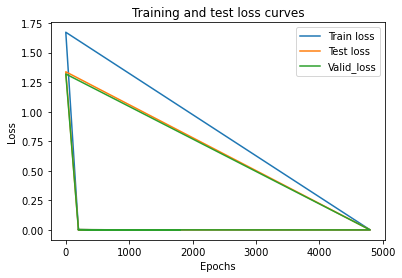

In [235]:
import matplotlib.pyplot as plt

num = 35

plt.plot(epochs_list[1:num], train_losses[1:num], label="Train loss")
plt.plot(epochs_list[1:num], test_losses[1:num], label="Test loss")
plt.plot(epochs_list[1:num], valid_losses[1:num], label="Valid_loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend();

In [236]:
mse = []
rmse = []
ranges = []

for num, model in enumerate(G_models, 0):
    
    model.eval()
    
    with torch.inference_mode():
        
        y_preds = model(X_G_test).squeeze()
    
        error = loss_fn(y_preds, y_test[:, num])
    
        mse.append(error.item())
        rmse.append(torch.sqrt(error).item())
        ranges.append(torch.max(y_test[:,num]).item() - torch.min(y_test[:,num]).item())
    
rel_errors = [i / j for i, j in zip(rmse, ranges)]

G_rel_error = statistics.mean(rel_errors)

print(f"Related error: {(G_rel_error*100):.4f} %")

Related error: 6.8410 %


In [59]:
G_rel_errors = []
G_rel_errors.append(G_rel_error)

G_rel_errors

[0.06615702788738048]

In [60]:
G_st_dev = statistics.pstdev(G_rel_errors)

G_rel_errors, G_st_dev

([0.06615702788738048], 0.0)

# Initial - M

In [61]:
input_dim = 31
hidden_units = 31
output_dim = 1

num_models = 15
M_models = []

for i in range(num_models):
    M_models.append(Initial_Model_V0(input_dim, hidden_units, output_dim).to(device))

In [62]:
X_M_train, y_train = X_M_train.to(device), y_train.to(device)
X_M_test, y_test = X_M_test.to(device), y_test.to(device)
X_M_valid, y_valid = X_M_valid.to(device), y_valid.to(device)

In [63]:
torch.manual_seed(67)

epochs = 8000
learning_rate = 0.002
momentum = 1.2
patience = 500
min_delta = 0
prev_valid_loss = torch.tensor([0]).to(device)

epochs_list=[]
train_losses=[]
test_losses=[]
valid_losses=[]
rel_errors = []

for num, model in enumerate(M_models, 0):
    
    print("Model num:", num)
    
    #optimizer = torch.optim.SGD(params=model.parameters(),
    #                            lr=learning_rate,
    #                            momentum=momentum)
    
    optimizer = torch.optim.Adam(params=model.parameters(),
                                 lr=learning_rate)
    
    early_stopping = EarlyStopping_V1(patience=patience, min_delta=min_delta)
    
    for epoch in range(epochs):
    
        model.train()
    
        y_preds = model(X_M_train).squeeze()
    
        train_loss = loss_fn(y_preds, y_train[:, num]) # вырезаю num-тый столбец
    
        optimizer.zero_grad()
    
        train_loss.backward()
    
        optimizer.step()
        
        
        model.eval()
    
        with torch.inference_mode():
            
            valid_preds = model(X_M_valid).squeeze()
            
            valid_loss = loss_fn(valid_preds, y_valid[:, num])
            
            early_stopping(prev_loss=prev_valid_loss,
                           next_loss=valid_loss)
            if early_stopping.early_stop:
                print("Early stopping at epoch:", epoch)
                break
            prev_valid_loss = valid_loss
            
        
            test_preds = model(X_M_test).squeeze()
        
            test_loss = loss_fn(test_preds, y_test[:, num])
            
        if epoch % 200 == 0:
            epochs_list.append(epoch)
            train_losses.append(train_loss.cpu().item())
            test_losses.append(test_loss.cpu().item())
            valid_losses.append(valid_loss.cpu().item())
            print(f"Epoch: {epoch} | Loss: {train_loss.item():.5f} | Test Loss: {test_loss.item():.5f} | Delta: {(valid_loss.item()):.5f}")
    
    print("=====================")

Model num: 0
Epoch: 0 | Loss: 1.30028 | Test Loss: 1.15618 | Delta: 1.14039
Epoch: 200 | Loss: 0.00773 | Test Loss: 0.00798 | Delta: 0.00768
Epoch: 400 | Loss: 0.00540 | Test Loss: 0.00550 | Delta: 0.00540
Epoch: 600 | Loss: 0.00508 | Test Loss: 0.00513 | Delta: 0.00509
Epoch: 800 | Loss: 0.00487 | Test Loss: 0.00491 | Delta: 0.00489
Epoch: 1000 | Loss: 0.00469 | Test Loss: 0.00472 | Delta: 0.00470
Epoch: 1200 | Loss: 0.00451 | Test Loss: 0.00455 | Delta: 0.00452
Epoch: 1400 | Loss: 0.00435 | Test Loss: 0.00438 | Delta: 0.00435
Epoch: 1600 | Loss: 0.00418 | Test Loss: 0.00421 | Delta: 0.00418
Epoch: 1800 | Loss: 0.00402 | Test Loss: 0.00404 | Delta: 0.00400
Epoch: 2000 | Loss: 0.00385 | Test Loss: 0.00387 | Delta: 0.00383
Epoch: 2200 | Loss: 0.00369 | Test Loss: 0.00370 | Delta: 0.00365
Epoch: 2400 | Loss: 0.00352 | Test Loss: 0.00352 | Delta: 0.00348
Epoch: 2600 | Loss: 0.00335 | Test Loss: 0.00335 | Delta: 0.00330
Epoch: 2800 | Loss: 0.00318 | Test Loss: 0.00318 | Delta: 0.00312
Epoc

In [64]:
# mse = []
rmse = []
ranges = []

for num, model in enumerate(M_models, 0):
    
    model.eval()
    
    with torch.inference_mode():
        
        y_preds = model(X_M_test).squeeze()
    
        error = loss_fn(y_preds, y_test[:, num])
    
        mse.append(error.item())
        rmse.append(torch.sqrt(error).item())
        ranges.append(torch.max(y_test[:,num]).item() - torch.min(y_test[:,num]).item())
    
rel_errors = [i / j for i, j in zip(rmse, ranges)]

M_rel_error = statistics.mean(rel_errors)
    
print(f"Related error: {(M_rel_error*100):.4f} %")

Related error: 7.9051 %


# Initial - MT

In [64]:
torch.manual_seed(42)

input_dim = 62
hidden_units = 32
output_dim = 1

num_models = 15
MT_models = []

for i in range(num_models):
    MT_models.append(Initial_Model_V0(input_dim, hidden_units, output_dim).to(device))

In [70]:
X_MT_train, y_train = X_MT_train.to(device), y_train.to(device)
X_MT_test, y_test = X_MT_test.to(device), y_test.to(device)
X_MT_valid, y_valid = X_MT_valid.to(device), y_valid.to(device)

X_MT_train

tensor([[-0.0218, -0.0221, -0.0232,  ..., -0.0733, -0.0740, -0.0746],
        [-0.0265, -0.0263, -0.0256,  ..., -0.0713, -0.0710, -0.0708],
        [-0.0266, -0.0265, -0.0261,  ..., -0.0726, -0.0725, -0.0724],
        ...,
        [-0.0238, -0.0237, -0.0235,  ..., -0.0745, -0.0749, -0.0752],
        [-0.0229, -0.0231, -0.0235,  ..., -0.0720, -0.0722, -0.0723],
        [-0.0217, -0.0219, -0.0222,  ..., -0.0722, -0.0720, -0.0718]],
       device='cuda:0')

In [66]:
X_MT_train_n = nn.functional.normalize(X_MT_train)
X_MT_test_n = nn.functional.normalize(X_MT_test)
X_MT_valid_n = nn.functional.normalize(X_MT_valid)

X_MT_train_n

tensor([[-0.0509, -0.0515, -0.0541,  ..., -0.1709, -0.1725, -0.1738],
        [-0.0620, -0.0613, -0.0598,  ..., -0.1664, -0.1658, -0.1654],
        [-0.0625, -0.0622, -0.0613,  ..., -0.1708, -0.1705, -0.1703],
        ...,
        [-0.0548, -0.0544, -0.0539,  ..., -0.1712, -0.1721, -0.1729],
        [-0.0541, -0.0545, -0.0555,  ..., -0.1701, -0.1704, -0.1707],
        [-0.0516, -0.0521, -0.0527,  ..., -0.1715, -0.1710, -0.1706]],
       device='cuda:0')

In [67]:
torch.manual_seed(42)

epochs = 15000
learning_rate = 0.001
momentum = 0.3
patience = 500
min_delta = 0
prev_valid_loss = torch.tensor([0]).to(device)

epochs_list=[]
train_losses=[]
test_losses=[]
valid_losses=[]
rel_errors = []

for num, model in enumerate(MT_models, 0):
    
    print("Model num:", num)
    
    #optimizer = torch.optim.SGD(params=model.parameters(),
    #                            lr=learning_rate,
    #                            momentum=momentum)
    
    optimizer = torch.optim.Adam(params=model.parameters(),
                                 lr=learning_rate,
                                 weight_decay=1e-7)
    
    early_stopping = EarlyStopping_V1(patience=patience, min_delta=min_delta)
    
    for epoch in range(epochs):
    
        model.train()
    
        y_preds = model(X_MT_train).squeeze()
    
        train_loss = loss_fn(y_preds, y_train[:, num]) # вырезаю num-тый столбец
    
        optimizer.zero_grad()
    
        train_loss.backward()
    
        optimizer.step()
        
        
        model.eval()
    
        with torch.inference_mode():
            
            valid_preds = model(X_MT_valid).squeeze()
            
            valid_loss = loss_fn(valid_preds, y_valid[:, num])
            
            early_stopping(prev_loss=prev_valid_loss,
                           next_loss=valid_loss)
            if early_stopping.early_stop:
                print("Early stopping at epoch:", epoch)
                break
            prev_valid_loss = valid_loss
            
        
            test_preds = model(X_MT_test).squeeze()
        
            test_loss = loss_fn(test_preds, y_test[:, num])
            
        if epoch % 200 == 0:
            epochs_list.append(epoch)
            train_losses.append(train_loss.cpu().item())
            test_losses.append(test_loss.cpu().item())
            valid_losses.append(valid_loss.cpu().item())
            print(f"Epoch: {epoch} | Loss: {train_loss.item():.5f} | Test Loss: {test_loss.item():.5f} | Valid loss: {(valid_loss.item()):.5f}")
            
    print("=====================")

Model num: 0
Epoch: 0 | Loss: 1.55496 | Test Loss: 1.51819 | Valid loss: 1.49661
Epoch: 200 | Loss: 0.01857 | Test Loss: 0.01887 | Valid loss: 0.01857
Epoch: 400 | Loss: 0.01857 | Test Loss: 0.01887 | Valid loss: 0.01857
Epoch: 600 | Loss: 0.01856 | Test Loss: 0.01887 | Valid loss: 0.01856
Epoch: 800 | Loss: 0.01856 | Test Loss: 0.01886 | Valid loss: 0.01856
Epoch: 1000 | Loss: 0.01855 | Test Loss: 0.01885 | Valid loss: 0.01855
Epoch: 1200 | Loss: 0.01855 | Test Loss: 0.01885 | Valid loss: 0.01854
Epoch: 1400 | Loss: 0.01854 | Test Loss: 0.01884 | Valid loss: 0.01854
Epoch: 1600 | Loss: 0.01853 | Test Loss: 0.01883 | Valid loss: 0.01853
Epoch: 1800 | Loss: 0.01852 | Test Loss: 0.01882 | Valid loss: 0.01852
Epoch: 2000 | Loss: 0.01851 | Test Loss: 0.01881 | Valid loss: 0.01851
Epoch: 2200 | Loss: 0.01850 | Test Loss: 0.01880 | Valid loss: 0.01850
Epoch: 2400 | Loss: 0.01848 | Test Loss: 0.01878 | Valid loss: 0.01848
Epoch: 2600 | Loss: 0.01847 | Test Loss: 0.01877 | Valid loss: 0.01847


In [69]:
mse = []
rmse = []
ranges = []

for num, model in enumerate(MT_models, 0):
    
    model.eval()
    
    with torch.inference_mode():
        
        y_preds = model(X_MT_test).squeeze()
    
        error = loss_fn(y_preds, y_test[:, num])
    
        mse.append(error.item())
        rmse.append(torch.sqrt(error).item())
        ranges.append(torch.max(y_test[:,num]).item() - torch.min(y_test[:,num]).item())
    
rel_errors = [i / j for i, j in zip(rmse, ranges)]

MT_rel_error = statistics.mean(rel_errors)
    
print(f"Related error: {(MT_rel_error*100):.4f} %")

Related error: 13.9972 %


In [69]:
#MT_rel_errors = []
MT_rel_errors.append(MT_rel_error)

MT_rel_errors

[0.14113162984643648,
 0.14093573865007625,
 0.14150706285893597,
 0.14094939812629195,
 0.14113730263189933,
 0.14113730263189933]

In [70]:
MT_st_dev = statistics.pstdev(MT_rel_errors)

MT_rel_errors, MT_st_dev

([0.14113162984643648,
  0.14093573865007625,
  0.14150706285893597,
  0.14094939812629195,
  0.14113730263189933,
  0.14113730263189933],
 0.00018823017015562438)

# Intagration - GM

In [71]:
input_dim = 62
hidden_units = 32
output_dim = 1

num_models = 15
G_M_models = []

for i in range(num_models):
    G_M_models.append(Initial_Model_V0(input_dim, hidden_units, output_dim).to(device))

In [72]:
X_G_M_train, y_train = X_G_M_train.to(device), y_train.to(device)
X_G_M_test, y_test = X_G_M_test.to(device), y_test.to(device)
X_G_M_valid, y_valid = X_G_M_valid.to(device), y_valid.to(device)

In [73]:
torch.manual_seed(67)

epochs = 8000
learning_rate = 0.0025
momentum = 0.8
patience = 500
min_delta = 0
prev_valid_loss = torch.tensor([0]).to(device)

epochs_list=[]
train_losses=[]
test_losses=[]
valid_losses=[]
rel_errors = []

for num, model in enumerate(G_M_models, 0):
    
    print("Model num:", num)
    
    #optimizer = torch.optim.SGD(params=model.parameters(),
    #                            lr=learning_rate,
    #                            momentum=momentum)
    
    optimizer = torch.optim.Adam(params=model.parameters(),
                                lr=learning_rate)
    
    early_stopping = EarlyStopping_V1(patience=patience, min_delta=min_delta)
    
    for epoch in range(epochs):
    
        model.train()
    
        y_preds = model(X_G_M_train).squeeze()
    
        train_loss = loss_fn(y_preds, y_train[:, num]) # вырезаю num-тый столбец
    
        optimizer.zero_grad()
    
        train_loss.backward()
    
        optimizer.step()
        
        
        model.eval()
    
        with torch.inference_mode():
            
            valid_preds = model(X_G_M_valid).squeeze()
            
            valid_loss = loss_fn(valid_preds, y_valid[:, num])
            
            early_stopping(prev_loss=prev_valid_loss,
                           next_loss=valid_loss)
            if early_stopping.early_stop:
                print("Early stopping at epoch:", epoch)
                break
            prev_valid_loss = valid_loss
            
        
            test_preds = model(X_G_M_test).squeeze()
        
            test_loss = loss_fn(test_preds, y_test[:, num])
            
        if epoch % 200 == 0:
            epochs_list.append(epoch)
            train_losses.append(train_loss.cpu().item())
            test_losses.append(test_loss.cpu().item())
            valid_losses.append(valid_loss.cpu().item())
            print(f"Epoch: {epoch} | Loss: {train_loss.item():.5f} | Test Loss: {test_loss.item():.5f} | Valid Loss: {(valid_loss.item()):.5f}")
            
    print("=====================")

Model num: 0
Epoch: 0 | Loss: 1.85840 | Test Loss: 1.60044 | Valid Loss: 1.56695
Epoch: 200 | Loss: 0.00303 | Test Loss: 0.00307 | Valid Loss: 0.00294
Epoch: 400 | Loss: 0.00227 | Test Loss: 0.00231 | Valid Loss: 0.00222
Epoch: 600 | Loss: 0.00197 | Test Loss: 0.00202 | Valid Loss: 0.00193
Epoch: 800 | Loss: 0.00178 | Test Loss: 0.00183 | Valid Loss: 0.00174
Epoch: 1000 | Loss: 0.00163 | Test Loss: 0.00169 | Valid Loss: 0.00160
Epoch: 1200 | Loss: 0.00151 | Test Loss: 0.00156 | Valid Loss: 0.00148
Epoch: 1400 | Loss: 0.00140 | Test Loss: 0.00146 | Valid Loss: 0.00138
Epoch: 1600 | Loss: 0.00130 | Test Loss: 0.00135 | Valid Loss: 0.00129
Epoch: 1800 | Loss: 0.00120 | Test Loss: 0.00125 | Valid Loss: 0.00119
Epoch: 2000 | Loss: 0.00110 | Test Loss: 0.00114 | Valid Loss: 0.00109
Epoch: 2200 | Loss: 0.00101 | Test Loss: 0.00104 | Valid Loss: 0.00100
Epoch: 2400 | Loss: 0.00093 | Test Loss: 0.00096 | Valid Loss: 0.00093
Epoch: 2600 | Loss: 0.00087 | Test Loss: 0.00090 | Valid Loss: 0.00087


In [74]:
mse = []
rmse = []
ranges = []

for num, model in enumerate(G_M_models, 0):
    
    model.eval()
    
    with torch.inference_mode():
        
        y_preds = model(X_G_M_test).squeeze()
    
        error = loss_fn(y_preds, y_test[:, num])
    
        mse.append(error.item())
        rmse.append(torch.sqrt(error).item())
        ranges.append(torch.max(y_test[:,num]).item() - torch.min(y_test[:,num]).item())
    
rel_errors = [i / j for i, j in zip(rmse, ranges)]

G_M_rel_error = statistics.mean(rel_errors)
    
print(f"Related error: {(G_M_rel_error*100):.4f} %")

Related error: 4.7960 %


# Integration - G + MT

In [75]:
input_dim = 93
hidden_units = 32
output_dim = 1

num_models = 15
G_MT_models = []

for i in range(num_models):
    G_MT_models.append(Initial_Model_V0(input_dim, hidden_units, output_dim).to(device))

In [76]:
X_G_MT_train, y_train = X_G_MT_train.to(device), y_train.to(device)
X_G_MT_test, y_test = X_G_MT_test.to(device), y_test.to(device)
X_G_MT_valid, y_valid = X_G_MT_valid.to(device), y_valid.to(device)

In [77]:
torch.manual_seed(67)

epochs = 8000
learning_rate = 0.0015
momentum = 0.8
patience = 500
min_delta = 0
prev_valid_loss = torch.tensor([0]).to(device)

epochs_list=[]
train_losses=[]
test_losses=[]
valid_losses=[]
rel_errors = []

for num, model in enumerate(G_MT_models, 0):
    
    print("Model num:", num)
    
    #optimizer = torch.optim.SGD(params=model.parameters(),
    #                            lr=learning_rate,
    #                            momentum=momentum)
    
    optimizer = torch.optim.Adam(params=model.parameters(),
                                lr=learning_rate)
    
    early_stopping = EarlyStopping_V1(patience=patience, min_delta=min_delta)
    
    for epoch in range(epochs):
    
        model.train()
    
        y_preds = model(X_G_MT_train).squeeze()
    
        train_loss = loss_fn(y_preds, y_train[:, num]) # вырезаю num-тый столбец
    
        optimizer.zero_grad()
    
        train_loss.backward()
    
        optimizer.step()
        
        
        model.eval()
    
        with torch.inference_mode():
            
            valid_preds = model(X_G_MT_valid).squeeze()
            
            valid_loss = loss_fn(valid_preds, y_valid[:, num])
            
            early_stopping(prev_loss=prev_valid_loss,
                           next_loss=valid_loss)
            if early_stopping.early_stop:
                print("Early stopping at epoch:", epoch)
                break
            prev_valid_loss = valid_loss
            
        
            test_preds = model(X_G_MT_test).squeeze()
        
            test_loss = loss_fn(test_preds, y_test[:, num])
            
        if epoch % 200 == 0:
            epochs_list.append(epoch)
            train_losses.append(train_loss.cpu().item())
            test_losses.append(test_loss.cpu().item())
            valid_losses.append(valid_loss.cpu().item())
            print(f"Epoch: {epoch} | Loss: {train_loss.item():.5f} | Test Loss: {test_loss.item():.5f} | Valid Loss: {(valid_loss.item()):.5f}")
            
    print("=====================")

Model num: 0
Epoch: 0 | Loss: 1.50762 | Test Loss: 1.36948 | Valid Loss: 1.35782
Epoch: 200 | Loss: 0.00298 | Test Loss: 0.00312 | Valid Loss: 0.00293
Epoch: 400 | Loss: 0.00265 | Test Loss: 0.00275 | Valid Loss: 0.00263
Epoch: 600 | Loss: 0.00250 | Test Loss: 0.00257 | Valid Loss: 0.00249
Epoch: 800 | Loss: 0.00237 | Test Loss: 0.00243 | Valid Loss: 0.00235
Epoch: 1000 | Loss: 0.00223 | Test Loss: 0.00229 | Valid Loss: 0.00222
Epoch: 1200 | Loss: 0.00209 | Test Loss: 0.00215 | Valid Loss: 0.00208
Epoch: 1400 | Loss: 0.00196 | Test Loss: 0.00201 | Valid Loss: 0.00194
Epoch: 1600 | Loss: 0.00184 | Test Loss: 0.00189 | Valid Loss: 0.00182
Epoch: 1800 | Loss: 0.00174 | Test Loss: 0.00178 | Valid Loss: 0.00172
Epoch: 2000 | Loss: 0.00165 | Test Loss: 0.00170 | Valid Loss: 0.00164
Epoch: 2200 | Loss: 0.00158 | Test Loss: 0.00162 | Valid Loss: 0.00157
Epoch: 2400 | Loss: 0.00152 | Test Loss: 0.00156 | Valid Loss: 0.00151
Epoch: 2600 | Loss: 0.00146 | Test Loss: 0.00150 | Valid Loss: 0.00146


In [78]:
mse = []
rmse = []
ranges = []

for num, model in enumerate(G_MT_models, 0):
    
    model.eval()
    
    with torch.inference_mode():
        
        y_preds = model(X_G_MT_test).squeeze()
    
        error = loss_fn(y_preds, y_test[:, num])
    
        mse.append(error.item())
        rmse.append(torch.sqrt(error).item())
        ranges.append(torch.max(y_test[:,num]).item() - torch.min(y_test[:,num]).item())
    
rel_errors = [i / j for i, j in zip(rmse, ranges)]

G_MT_rel_error = statistics.mean(rel_errors)
    
print(f"Related error: {(G_MT_rel_error*100):.4f} %")

Related error: 4.9474 %


# Integration - M + MT

In [79]:
input_dim = 93
hidden_units = 32
output_dim = 1

num_models = 15
M_MT_models = []

for i in range(num_models):
    M_MT_models.append(Initial_Model_V0(input_dim, hidden_units, output_dim).to(device))

In [80]:
X_M_MT_train, y_train = X_M_MT_train.to(device), y_train.to(device)
X_M_MT_test, y_test = X_M_MT_test.to(device), y_test.to(device)
X_M_MT_valid, y_valid = X_M_MT_valid.to(device), y_valid.to(device)

In [81]:
torch.manual_seed(67)

epochs = 8000
learning_rate = 0.002
momentum = 0.8
patience = 500
min_delta = 0
prev_valid_loss = torch.tensor([0]).to(device)

epochs_list=[]
train_losses=[]
test_losses=[]
valid_losses=[]
rel_errors = []

for num, model in enumerate(M_MT_models, 0):
    
    print("Model num:", num)
    
    #optimizer = torch.optim.SGD(params=model.parameters(),
    #                            lr=learning_rate,
    #                            momentum=momentum)
    
    optimizer = torch.optim.Adam(params=model.parameters(),
                                lr=learning_rate)
    
    early_stopping = EarlyStopping_V1(patience=patience, min_delta=min_delta)
    
    for epoch in range(epochs):
    
        model.train()
    
        y_preds = model(X_M_MT_train).squeeze()
    
        train_loss = loss_fn(y_preds, y_train[:, num]) # вырезаю num-тый столбец
    
        optimizer.zero_grad()
    
        train_loss.backward()
    
        optimizer.step()
        
        
        model.eval()
    
        with torch.inference_mode():
            
            valid_preds = model(X_M_MT_valid).squeeze()
            
            valid_loss = loss_fn(valid_preds, y_valid[:, num])
            
            early_stopping(prev_loss=prev_valid_loss,
                           next_loss=valid_loss)
            if early_stopping.early_stop:
                print("Early stopping at epoch:", epoch)
                break
            prev_valid_loss = valid_loss
            
        
            test_preds = model(X_M_MT_test).squeeze()
        
            test_loss = loss_fn(test_preds, y_test[:, num])
            
        if epoch % 200 == 0:
            epochs_list.append(epoch)
            train_losses.append(train_loss.cpu().item())
            test_losses.append(test_loss.cpu().item())
            valid_losses.append(valid_loss.cpu().item())
            print(f"Epoch: {epoch} | Loss: {train_loss.item():.5f} | Test Loss: {test_loss.item():.5f} | Valid Loss: {(valid_loss.item()):.5f}")
            
    print("=====================")

Model num: 0
Epoch: 0 | Loss: 1.93017 | Test Loss: 1.74044 | Valid Loss: 1.72319
Epoch: 200 | Loss: 0.00925 | Test Loss: 0.00953 | Valid Loss: 0.00914
Epoch: 400 | Loss: 0.00547 | Test Loss: 0.00563 | Valid Loss: 0.00544
Epoch: 600 | Loss: 0.00492 | Test Loss: 0.00500 | Valid Loss: 0.00491
Epoch: 800 | Loss: 0.00476 | Test Loss: 0.00482 | Valid Loss: 0.00475
Epoch: 1000 | Loss: 0.00462 | Test Loss: 0.00467 | Valid Loss: 0.00460
Epoch: 1200 | Loss: 0.00448 | Test Loss: 0.00452 | Valid Loss: 0.00446
Epoch: 1400 | Loss: 0.00433 | Test Loss: 0.00437 | Valid Loss: 0.00431
Epoch: 1600 | Loss: 0.00418 | Test Loss: 0.00421 | Valid Loss: 0.00415
Epoch: 1800 | Loss: 0.00402 | Test Loss: 0.00405 | Valid Loss: 0.00399
Epoch: 2000 | Loss: 0.00386 | Test Loss: 0.00388 | Valid Loss: 0.00382
Epoch: 2200 | Loss: 0.00369 | Test Loss: 0.00370 | Valid Loss: 0.00365
Epoch: 2400 | Loss: 0.00350 | Test Loss: 0.00352 | Valid Loss: 0.00346
Epoch: 2600 | Loss: 0.00331 | Test Loss: 0.00332 | Valid Loss: 0.00326


In [82]:
mse = []
rmse = []
ranges = []

for num, model in enumerate(M_MT_models, 0):
    
    model.eval()
    
    with torch.inference_mode():
        
        y_preds = model(X_M_MT_test).squeeze()
    
        error = loss_fn(y_preds, y_test[:, num])
    
        mse.append(error.item())
        rmse.append(torch.sqrt(error).item())
        ranges.append(torch.max(y_test[:,num]).item() - torch.min(y_test[:,num]).item())
    
rel_errors = [i / j for i, j in zip(rmse, ranges)]

M_MT_rel_error = statistics.mean(rel_errors)
    
print(f"Related error: {(M_MT_rel_error*100):.4f} %")

Related error: 5.1031 %


# Integration - G + M + MT

In [83]:
input_dim = 124
hidden_units = 32
output_dim = 1

num_models = 15
G_M_MT_models = []

for i in range(num_models):
    G_M_MT_models.append(Initial_Model_V0(input_dim, hidden_units, output_dim).to(device))

In [84]:
X_G_M_MT_train, y_train = X_G_M_MT_train.to(device), y_train.to(device)
X_G_M_MT_test, y_test = X_G_M_MT_test.to(device), y_test.to(device)
X_G_M_MT_valid, y_valid = X_G_M_MT_valid.to(device), y_valid.to(device)

In [85]:
torch.manual_seed(67)

epochs = 8000
learning_rate = 0.001
momentum = 1.0
patience = 500
min_delta = 0
prev_valid_loss = torch.tensor([0]).to(device)

epochs_list=[]
train_losses=[]
test_losses=[]
valid_losses=[]
rel_errors = []

for num, model in enumerate(G_M_MT_models, 0):
    
    print("Model num:", num)
    
    #optimizer = torch.optim.SGD(params=model.parameters(),
    #                            lr=learning_rate,
    #                            momentum=momentum)
    
    optimizer = torch.optim.Adam(params=model.parameters(),
                                lr=learning_rate)
    
    early_stopping = EarlyStopping_V1(patience=patience, min_delta=min_delta)
    
    for epoch in range(epochs):
    
        model.train()
    
        y_preds = model(X_G_M_MT_train).squeeze()
    
        train_loss = loss_fn(y_preds, y_train[:, num]) # вырезаю num-тый столбец
    
        optimizer.zero_grad()
    
        train_loss.backward()
    
        optimizer.step()
        
        
        model.eval()
    
        with torch.inference_mode():
            
            valid_preds = model(X_G_M_MT_valid).squeeze()
            
            valid_loss = loss_fn(valid_preds, y_valid[:, num])
            
            early_stopping(prev_loss=prev_valid_loss,
                           next_loss=valid_loss)
            if early_stopping.early_stop:
                print("Early stopping at epoch:", epoch)
                break
            prev_valid_loss = valid_loss
            
        
            test_preds = model(X_G_M_MT_test).squeeze()
        
            test_loss = loss_fn(test_preds, y_test[:, num])
            
        if epoch % 200 == 0:
            epochs_list.append(epoch)
            train_losses.append(train_loss.cpu().item())
            test_losses.append(test_loss.cpu().item())
            valid_losses.append(valid_loss.cpu().item())
            print(f"Epoch: {epoch} | Loss: {train_loss.item():.5f} | Test Loss: {test_loss.item():.5f} | Valid Loss: {(valid_loss.item()):.5f}")
            
    print("=====================")

Model num: 0
Epoch: 0 | Loss: 0.86603 | Test Loss: 0.78196 | Valid Loss: 0.76145
Epoch: 200 | Loss: 0.00284 | Test Loss: 0.00282 | Valid Loss: 0.00282
Epoch: 400 | Loss: 0.00230 | Test Loss: 0.00235 | Valid Loss: 0.00227
Epoch: 600 | Loss: 0.00207 | Test Loss: 0.00213 | Valid Loss: 0.00205
Epoch: 800 | Loss: 0.00191 | Test Loss: 0.00195 | Valid Loss: 0.00188
Epoch: 1000 | Loss: 0.00177 | Test Loss: 0.00181 | Valid Loss: 0.00174
Epoch: 1200 | Loss: 0.00166 | Test Loss: 0.00170 | Valid Loss: 0.00163
Epoch: 1400 | Loss: 0.00156 | Test Loss: 0.00160 | Valid Loss: 0.00154
Epoch: 1600 | Loss: 0.00148 | Test Loss: 0.00152 | Valid Loss: 0.00146
Epoch: 1800 | Loss: 0.00140 | Test Loss: 0.00144 | Valid Loss: 0.00138
Epoch: 2000 | Loss: 0.00133 | Test Loss: 0.00136 | Valid Loss: 0.00131
Epoch: 2200 | Loss: 0.00126 | Test Loss: 0.00128 | Valid Loss: 0.00124
Epoch: 2400 | Loss: 0.00118 | Test Loss: 0.00121 | Valid Loss: 0.00116
Epoch: 2600 | Loss: 0.00111 | Test Loss: 0.00113 | Valid Loss: 0.00109


In [86]:
mse = []
rmse = []
ranges = []

for num, model in enumerate(G_M_MT_models, 0):
    
    model.eval()
    
    with torch.inference_mode():
        
        y_preds = model(X_G_M_MT_test).squeeze()
    
        error = loss_fn(y_preds, y_test[:, num])
    
        mse.append(error.item())
        rmse.append(torch.sqrt(error).item())
        ranges.append(torch.max(y_test[:,num]).item() - torch.min(y_test[:,num]).item())
    
rel_errors = [i / j for i, j in zip(rmse, ranges)]

G_M_MT_rel_error = statistics.mean(rel_errors)
    
print(f"Related error: {(G_M_MT_rel_error*100):.4f} %")

Related error: 3.6485 %


# Stacking - G + M

In [72]:
input_dim_1 = 31
input_dim_2 = 31
hidden_units = 32
output_dim = 1
num_methods = 2

meta_input_dim = 10

num_models = 15
G_M_stacking_models = []
    
for i in range(num_models):
    G_M_stacking_models.append(Initial_Model_V0(meta_input_dim, hidden_units, output_dim).to(device))
    
next(G_M_stacking_models[1].parameters()).is_cuda

True

In [73]:
X_G_train, y_train = X_G_train.to(device), y_train.to(device)
X_G_test, y_test = X_G_test.to(device), y_test.to(device)
X_G_valid, y_valid = X_G_valid.to(device), y_valid.to(device)

X_M_train = X_M_train.to(device)
X_M_test = X_M_test.to(device)
X_M_valid = X_M_valid.to(device)

X_G_train.shape

torch.Size([21000, 31])

In [74]:
num_NN_in_set = 5

# Training

G_pre_preds = []
M_pre_preds = []
G_preds = []
M_preds = []

for num_in_set in range(num_NN_in_set):
    
    for num, model in enumerate(G_models, 0):
    
        model.eval()
    
        with torch.inference_mode():
        
            y_G_preds = model(X_G_train)
            G_pre_preds.append(y_G_preds)

    G_temp = torch.cat(G_pre_preds, 1).unsqueeze(2)
    G_preds.append(G_temp)
    G_pre_preds = []
    
    for num, model in enumerate(M_models, 0):
    
        model.eval()
    
        with torch.inference_mode():
        
            y_M_preds = model(X_M_train)
            M_pre_preds.append(y_M_preds)

    M_temp = torch.cat(M_pre_preds, 1).unsqueeze(2)
    M_preds.append(M_temp)
    M_pre_preds = []

X_G_M_stack_train = torch.cat((torch.cat(G_preds, 2), torch.cat(M_preds, 2)), 2)

NameError: name 'G_models' is not defined

In [ ]:
# Validation

G_pre_preds = []
M_pre_preds = []
G_preds = []
M_preds = []

for num_in_set in range(num_NN_in_set):
    
    for num, model in enumerate(G_models, 0):
    
        model.eval()
    
        with torch.inference_mode():
        
            y_G_preds = model(X_G_valid)
            G_pre_preds.append(y_G_preds)

    G_temp = torch.cat(G_pre_preds, 1).unsqueeze(2)
    G_preds.append(G_temp)
    G_pre_preds = []
    
    for num, model in enumerate(M_models, 0):
    
        model.eval()
    
        with torch.inference_mode():
        
            y_M_preds = model(X_M_valid)
            M_pre_preds.append(y_M_preds)

    M_temp = torch.cat(M_pre_preds, 1).unsqueeze(2)
    M_preds.append(M_temp)
    M_pre_preds = []

X_G_M_stack_valid = torch.cat((torch.cat(G_preds, 2), torch.cat(M_preds, 2)), 2)

In [ ]:
# Test

G_pre_preds = []
M_pre_preds = []
G_preds = []
M_preds = []

for num_in_set in range(num_NN_in_set):
    
    for num, model in enumerate(G_models, 0):
    
        model.eval()
    
        with torch.inference_mode():
        
            y_G_preds = model(X_G_test)
            G_pre_preds.append(y_G_preds)

    G_temp = torch.cat(G_pre_preds, 1).unsqueeze(2)
    G_preds.append(G_temp)
    G_pre_preds = []
    
    for num, model in enumerate(M_models, 0):
    
        model.eval()
    
        with torch.inference_mode():
        
            y_M_preds = model(X_M_test)
            M_pre_preds.append(y_M_preds)

    M_temp = torch.cat(M_pre_preds, 1).unsqueeze(2)
    M_preds.append(M_temp)
    M_pre_preds = []

X_G_M_stack_test = torch.cat((torch.cat(G_preds, 2), torch.cat(M_preds, 2)), 2)

X_G_M_stack_test

In [92]:
torch.manual_seed(67)

epochs = 7000
learning_rate = 0.001
momentum = 1.2
patience = 500
min_delta = 0
prev_valid_loss = torch.tensor([0]).to(device)

epochs_list=[]
train_losses=[]
test_losses=[]
valid_losses=[]
rel_errors = []

for num, model in enumerate(G_M_stacking_models, 0):
    
    print("Model num:", num)
    
    #optimizer = torch.optim.SGD(params=model.parameters(),
    #                            lr=learning_rate,
    #                            momentum=momentum)
    
    optimizer = torch.optim.Adam(params=model.parameters(),
                                 lr=learning_rate)
    
    early_stopping = EarlyStopping_V1(patience=patience, min_delta=min_delta)
    
    for epoch in range(epochs):
    
        model.train()
    
        y_preds = model(X_G_M_stack_train[:, num, :]).squeeze() # беру результаты сетей для num столбца
                                                                # по смыслу - результаты G M на num координате слоя
        train_loss = loss_fn(y_preds, y_train[:, num]) # вырезаю num-тый столбец
    
        optimizer.zero_grad()
    
        train_loss.backward()
    
        optimizer.step()
        
        
        model.eval()
    
        with torch.inference_mode():
            
            valid_preds = model(X_G_M_stack_valid[:, num, :]).squeeze()
            
            valid_loss = loss_fn(valid_preds, y_valid[:, num])
            
            early_stopping(prev_loss=prev_valid_loss,
                           next_loss=valid_loss)
            if early_stopping.early_stop:
                print("Early stopping at epoch:", epoch)
                break
            prev_valid_loss = valid_loss
            
        
            test_preds = model(X_G_M_stack_test[:, num, :]).squeeze()
        
            test_loss = loss_fn(test_preds, y_test[:, num])
            
        if epoch % 200 == 0:
            epochs_list.append(epoch)
            train_losses.append(train_loss.cpu().item())
            test_losses.append(test_loss.cpu().item())
            valid_losses.append(valid_loss.cpu().item())
            print(f"Epoch: {epoch} | Loss: {train_loss.item():.5f} | Test Loss: {test_loss.item():.5f} | Valid Loss: {(valid_loss.item()):.5f}")
            
    print("=====================")

Model num: 0
Epoch: 0 | Loss: 2.12102 | Test Loss: 2.05732 | Valid Loss: 2.03532
Epoch: 200 | Loss: 0.00748 | Test Loss: 0.00759 | Valid Loss: 0.00744
Epoch: 400 | Loss: 0.00704 | Test Loss: 0.00714 | Valid Loss: 0.00700
Epoch: 600 | Loss: 0.00650 | Test Loss: 0.00659 | Valid Loss: 0.00645
Epoch: 800 | Loss: 0.00591 | Test Loss: 0.00600 | Valid Loss: 0.00586
Epoch: 1000 | Loss: 0.00531 | Test Loss: 0.00539 | Valid Loss: 0.00526
Epoch: 1200 | Loss: 0.00471 | Test Loss: 0.00478 | Valid Loss: 0.00466
Epoch: 1400 | Loss: 0.00415 | Test Loss: 0.00421 | Valid Loss: 0.00410
Epoch: 1600 | Loss: 0.00362 | Test Loss: 0.00368 | Valid Loss: 0.00357
Epoch: 1800 | Loss: 0.00314 | Test Loss: 0.00319 | Valid Loss: 0.00309
Epoch: 2000 | Loss: 0.00272 | Test Loss: 0.00276 | Valid Loss: 0.00267
Epoch: 2200 | Loss: 0.00235 | Test Loss: 0.00239 | Valid Loss: 0.00231
Epoch: 2400 | Loss: 0.00205 | Test Loss: 0.00209 | Valid Loss: 0.00200
Epoch: 2600 | Loss: 0.00181 | Test Loss: 0.00184 | Valid Loss: 0.00176


In [93]:
mse = []
rmse = []
ranges = []

for num, model in enumerate(G_M_stacking_models, 0):
    
    model.eval()
    
    with torch.inference_mode():
        
        y_preds = model(X_G_M_stack_test[:, num, :]).squeeze()
    
        error = loss_fn(y_preds, y_test[:, num])
    
        mse.append(error.item())
        rmse.append(torch.sqrt(error).item())
        ranges.append(torch.max(y_test[:,num]).item() - torch.min(y_test[:,num]).item())
    
rel_errors = [i / j for i, j in zip(rmse, ranges)]

G_M_stack_rel_error = statistics.mean(rel_errors)
    
print(f"Related error: {(G_M_stack_rel_error*100):.4f} %")

Related error: 6.5036 %


# Stacking - G + MT

In [94]:
input_dim_1 = 31
input_dim_2 = 62
hidden_units = 32
output_dim = 1
num_methods = 2

meta_input_dim = 10

num_models = 15
G_MT_stacking_models = []
    
for i in range(num_models):
    G_MT_stacking_models.append(Initial_Model_V0(meta_input_dim, hidden_units, output_dim).to(device))
    
next(G_MT_stacking_models[1].parameters()).is_cuda

True

In [95]:
X_G_train, y_train = X_G_train.to(device), y_train.to(device)
X_G_test, y_test = X_G_test.to(device), y_test.to(device)
X_G_valid, y_valid = X_G_valid.to(device), y_valid.to(device)

X_MT_train = X_MT_train.to(device)
X_MT_test = X_MT_test.to(device)
X_MT_valid = X_MT_valid.to(device)

X_G_train.shape

torch.Size([21000, 31])

In [96]:
num_NN_in_set = 5

# Training

G_pre_preds = []
MT_pre_preds = []
G_preds = []
MT_preds = []

for num_in_set in range(num_NN_in_set):
    
    for num, model in enumerate(G_models, 0):
    
        model.eval()
    
        with torch.inference_mode():
        
            y_G_preds = model(X_G_train)
            G_pre_preds.append(y_G_preds)

    G_temp = torch.cat(G_pre_preds, 1).unsqueeze(2)
    G_preds.append(G_temp)
    G_pre_preds = []
    
    for num, model in enumerate(MT_models, 0):
    
        model.eval()
    
        with torch.inference_mode():
        
            y_MT_preds = model(X_MT_train)
            MT_pre_preds.append(y_MT_preds)

    MT_temp = torch.cat(MT_pre_preds, 1).unsqueeze(2)
    MT_preds.append(MT_temp)
    MT_pre_preds = []

X_G_MT_stack_train = torch.cat((torch.cat(G_preds, 2), torch.cat(MT_preds, 2)), 2)
X_G_MT_stack_train.shape

torch.Size([21000, 15, 10])

In [97]:
# Validation

G_pre_preds = []
MT_pre_preds = []
G_preds = []
MT_preds = []

for num_in_set in range(num_NN_in_set):
    
    for num, model in enumerate(G_models, 0):
    
        model.eval()
    
        with torch.inference_mode():
        
            y_G_preds = model(X_G_valid)
            G_pre_preds.append(y_G_preds)

    G_temp = torch.cat(G_pre_preds, 1).unsqueeze(2)
    G_preds.append(G_temp)
    G_pre_preds = []
    
    for num, model in enumerate(MT_models, 0):
    
        model.eval()
    
        with torch.inference_mode():
        
            y_MT_preds = model(X_MT_valid)
            MT_pre_preds.append(y_MT_preds)

    MT_temp = torch.cat(MT_pre_preds, 1).unsqueeze(2)
    MT_preds.append(MT_temp)
    MT_pre_preds = []

X_G_MT_stack_valid = torch.cat((torch.cat(G_preds, 2), torch.cat(MT_preds, 2)), 2)
X_G_MT_stack_valid.shape

torch.Size([6000, 15, 10])

In [98]:
# Test

G_pre_preds = []
MT_pre_preds = []
G_preds = []
MT_preds = []

for num_in_set in range(num_NN_in_set):
    
    for num, model in enumerate(G_models, 0):
    
        model.eval()
    
        with torch.inference_mode():
        
            y_G_preds = model(X_G_test)
            G_pre_preds.append(y_G_preds)

    G_temp = torch.cat(G_pre_preds, 1).unsqueeze(2)
    G_preds.append(G_temp)
    G_pre_preds = []
    
    for num, model in enumerate(MT_models, 0):
    
        model.eval()
    
        with torch.inference_mode():
        
            y_MT_preds = model(X_MT_test)
            MT_pre_preds.append(y_MT_preds)

    MT_temp = torch.cat(MT_pre_preds, 1).unsqueeze(2)
    MT_preds.append(MT_temp)
    MT_pre_preds = []

X_G_MT_stack_test = torch.cat((torch.cat(G_preds, 2), torch.cat(MT_preds, 2)), 2)
X_G_MT_stack_test.shape

torch.Size([3000, 15, 10])

In [99]:
torch.manual_seed(67)

epochs = 7000
learning_rate = 0.001
momentum = 1.2
patience = 500
min_delta = 0
prev_valid_loss = torch.tensor([0]).to(device)

epochs_list=[]
train_losses=[]
test_losses=[]
valid_losses=[]
rel_errors = []

for num, model in enumerate(G_MT_stacking_models, 0):
    
    print("Model num:", num)
    
    #optimizer = torch.optim.SGD(params=model.parameters(),
    #                            lr=learning_rate,
    #                            momentum=momentum)
    
    optimizer = torch.optim.Adam(params=model.parameters(),
                                 lr=learning_rate)
    
    early_stopping = EarlyStopping_V1(patience=patience, min_delta=min_delta)
    
    for epoch in range(epochs):
    
        model.train()
    
        y_preds = model(X_G_MT_stack_train[:, num, :]).squeeze() # беру результаты сетей для num столбца
                                                                # по смыслу - результаты G M на num координате слоя
        train_loss = loss_fn(y_preds, y_train[:, num]) # вырезаю num-тый столбец
    
        optimizer.zero_grad()
    
        train_loss.backward()
    
        optimizer.step()
        
        
        model.eval()
    
        with torch.inference_mode():
            
            valid_preds = model(X_G_MT_stack_valid[:, num, :]).squeeze()
            
            valid_loss = loss_fn(valid_preds, y_valid[:, num])
            
            early_stopping(prev_loss=prev_valid_loss,
                           next_loss=valid_loss)
            if early_stopping.early_stop:
                print("Early stopping at epoch:", epoch)
                break
            prev_valid_loss = valid_loss
            
        
            test_preds = model(X_G_MT_stack_test[:, num, :]).squeeze()
        
            test_loss = loss_fn(test_preds, y_test[:, num])
            
        if epoch % 200 == 0:
            epochs_list.append(epoch)
            train_losses.append(train_loss.cpu().item())
            test_losses.append(test_loss.cpu().item())
            valid_losses.append(valid_loss.cpu().item())
            print(f"Epoch: {epoch} | Loss: {train_loss.item():.5f} | Test Loss: {test_loss.item():.5f} | Valid Loss: {(valid_loss.item()):.5f}")
            
    print("=====================")

Model num: 0
Epoch: 0 | Loss: 2.12298 | Test Loss: 2.05964 | Valid Loss: 2.03762
Epoch: 200 | Loss: 0.00811 | Test Loss: 0.00825 | Valid Loss: 0.00811
Epoch: 400 | Loss: 0.00767 | Test Loss: 0.00781 | Valid Loss: 0.00767
Epoch: 600 | Loss: 0.00713 | Test Loss: 0.00726 | Valid Loss: 0.00713
Epoch: 800 | Loss: 0.00654 | Test Loss: 0.00666 | Valid Loss: 0.00653
Epoch: 1000 | Loss: 0.00591 | Test Loss: 0.00602 | Valid Loss: 0.00591
Epoch: 1200 | Loss: 0.00528 | Test Loss: 0.00539 | Valid Loss: 0.00528
Epoch: 1400 | Loss: 0.00467 | Test Loss: 0.00476 | Valid Loss: 0.00466
Epoch: 1600 | Loss: 0.00408 | Test Loss: 0.00416 | Valid Loss: 0.00407
Epoch: 1800 | Loss: 0.00352 | Test Loss: 0.00360 | Valid Loss: 0.00351
Epoch: 2000 | Loss: 0.00301 | Test Loss: 0.00308 | Valid Loss: 0.00300
Epoch: 2200 | Loss: 0.00255 | Test Loss: 0.00262 | Valid Loss: 0.00254
Epoch: 2400 | Loss: 0.00215 | Test Loss: 0.00221 | Valid Loss: 0.00214
Epoch: 2600 | Loss: 0.00181 | Test Loss: 0.00187 | Valid Loss: 0.00180


In [100]:
mse = []
rmse = []
ranges = []

for num, model in enumerate(G_MT_stacking_models, 0):
    
    model.eval()
    
    with torch.inference_mode():
        
        y_preds = model(X_G_MT_stack_test[:, num, :]).squeeze()
    
        error = loss_fn(y_preds, y_test[:, num])
    
        mse.append(error.item())
        rmse.append(torch.sqrt(error).item())
        ranges.append(torch.max(y_test[:,num]).item() - torch.min(y_test[:,num]).item())
    
rel_errors = [i / j for i, j in zip(rmse, ranges)]

G_MT_stack_rel_error = statistics.mean(rel_errors)
    
print(f"Related error: {(G_MT_stack_rel_error*100):.4f} %")

Related error: 5.4873 %


# Stacking - M + MT

In [101]:
input_dim_1 = 31
input_dim_2 = 62
hidden_units = 32
output_dim = 1
num_methods = 2

meta_input_dim = 10

num_models = 15
M_MT_stacking_models = []
    
for i in range(num_models):
    M_MT_stacking_models.append(Initial_Model_V0(meta_input_dim, hidden_units, output_dim).to(device))
    
next(M_MT_stacking_models[1].parameters()).is_cuda

True

In [102]:
X_M_train, y_train = X_M_train.to(device), y_train.to(device)
X_M_test, y_test = X_M_test.to(device), y_test.to(device)
X_M_valid, y_valid = X_M_valid.to(device), y_valid.to(device)

X_MT_train = X_MT_train.to(device)
X_MT_test = X_MT_test.to(device)
X_MT_valid = X_MT_valid.to(device)

X_G_train.shape

torch.Size([21000, 31])

In [103]:
num_NN_in_set = 5

# Training

M_pre_preds = []
MT_pre_preds = []
M_preds = []
MT_preds = []

for num_in_set in range(num_NN_in_set):
    
    for num, model in enumerate(M_models, 0):
    
        model.eval()
    
        with torch.inference_mode():
        
            y_M_preds = model(X_M_train)
            M_pre_preds.append(y_M_preds)

    M_temp = torch.cat(M_pre_preds, 1).unsqueeze(2)
    M_preds.append(M_temp)
    M_pre_preds = []
    
    for num, model in enumerate(MT_models, 0):
    
        model.eval()
    
        with torch.inference_mode():
        
            y_MT_preds = model(X_MT_train)
            MT_pre_preds.append(y_MT_preds)

    MT_temp = torch.cat(MT_pre_preds, 1).unsqueeze(2)
    MT_preds.append(MT_temp)
    MT_pre_preds = []

X_M_MT_stack_train = torch.cat((torch.cat(M_preds, 2), torch.cat(MT_preds, 2)), 2)
X_M_MT_stack_train.shape

torch.Size([21000, 15, 10])

In [104]:
# Validation

M_pre_preds = []
MT_pre_preds = []
M_preds = []
MT_preds = []

for num_in_set in range(num_NN_in_set):
    
    for num, model in enumerate(M_models, 0):
    
        model.eval()
    
        with torch.inference_mode():
        
            y_M_preds = model(X_M_valid)
            M_pre_preds.append(y_M_preds)

    M_temp = torch.cat(M_pre_preds, 1).unsqueeze(2)
    M_preds.append(M_temp)
    M_pre_preds = []
    
    for num, model in enumerate(MT_models, 0):
    
        model.eval()
    
        with torch.inference_mode():
        
            y_MT_preds = model(X_MT_valid)
            MT_pre_preds.append(y_MT_preds)

    MT_temp = torch.cat(MT_pre_preds, 1).unsqueeze(2)
    MT_preds.append(MT_temp)
    MT_pre_preds = []

X_M_MT_stack_valid = torch.cat((torch.cat(M_preds, 2), torch.cat(MT_preds, 2)), 2)
X_M_MT_stack_valid.shape

torch.Size([6000, 15, 10])

In [105]:
# Validation

M_pre_preds = []
MT_pre_preds = []
M_preds = []
MT_preds = []

for num_in_set in range(num_NN_in_set):
    
    for num, model in enumerate(M_models, 0):
    
        model.eval()
    
        with torch.inference_mode():
        
            y_M_preds = model(X_M_test)
            M_pre_preds.append(y_M_preds)

    M_temp = torch.cat(M_pre_preds, 1).unsqueeze(2)
    M_preds.append(M_temp)
    M_pre_preds = []
    
    for num, model in enumerate(MT_models, 0):
    
        model.eval()
    
        with torch.inference_mode():
        
            y_MT_preds = model(X_MT_test)
            MT_pre_preds.append(y_MT_preds)

    MT_temp = torch.cat(MT_pre_preds, 1).unsqueeze(2)
    MT_preds.append(MT_temp)
    MT_pre_preds = []

X_M_MT_stack_test = torch.cat((torch.cat(M_preds, 2), torch.cat(MT_preds, 2)), 2)
X_M_MT_stack_test.shape

torch.Size([3000, 15, 10])

In [106]:
torch.manual_seed(67)

epochs = 7000
learning_rate = 0.002
momentum = 1.3
patience = 500
min_delta = 0
prev_valid_loss = torch.tensor([0]).to(device)

epochs_list=[]
train_losses=[]
test_losses=[]
valid_losses=[]
rel_errors = []

for num, model in enumerate(M_MT_stacking_models, 0):
    
    print("Model num:", num)
    
    #optimizer = torch.optim.SGD(params=model.parameters(),
    #                            lr=learning_rate,
    #                            momentum=momentum)
    
    optimizer = torch.optim.Adam(params=model.parameters(),
                                 lr=learning_rate)
    
    early_stopping = EarlyStopping_V1(patience=patience, min_delta=min_delta)
    
    for epoch in range(epochs):
    
        model.train()
    
        y_preds = model(X_M_MT_stack_train[:, num, :]).squeeze() # беру результаты сетей для num столбца
                                                                # по смыслу - результаты G M на num координате слоя
        train_loss = loss_fn(y_preds, y_train[:, num]) # вырезаю num-тый столбец
    
        optimizer.zero_grad()
    
        train_loss.backward()
    
        optimizer.step()
        
        
        model.eval()
    
        with torch.inference_mode():
            
            valid_preds = model(X_M_MT_stack_valid[:, num, :]).squeeze()
            
            valid_loss = loss_fn(valid_preds, y_valid[:, num])
            
            early_stopping(prev_loss=prev_valid_loss,
                           next_loss=valid_loss)
            if early_stopping.early_stop:
                print("Early stopping at epoch:", epoch)
                break
            prev_valid_loss = valid_loss
            
        
            test_preds = model(X_M_MT_stack_test[:, num, :]).squeeze()
        
            test_loss = loss_fn(test_preds, y_test[:, num])
            
        if epoch % 200 == 0:
            epochs_list.append(epoch)
            train_losses.append(train_loss.cpu().item())
            test_losses.append(test_loss.cpu().item())
            valid_losses.append(valid_loss.cpu().item())
            print(f"Epoch: {epoch} | Loss: {train_loss.item():.5f} | Test Loss: {test_loss.item():.5f} | Valid Loss: {(valid_loss.item()):.5f}")
            
    print("=====================")

Model num: 0
Epoch: 0 | Loss: 2.12216 | Test Loss: 1.98513 | Valid Loss: 1.96351
Epoch: 200 | Loss: 0.00815 | Test Loss: 0.00826 | Valid Loss: 0.00814
Epoch: 400 | Loss: 0.00709 | Test Loss: 0.00719 | Valid Loss: 0.00707
Epoch: 600 | Loss: 0.00596 | Test Loss: 0.00604 | Valid Loss: 0.00594
Epoch: 800 | Loss: 0.00489 | Test Loss: 0.00495 | Valid Loss: 0.00486
Epoch: 1000 | Loss: 0.00393 | Test Loss: 0.00399 | Valid Loss: 0.00390
Epoch: 1200 | Loss: 0.00313 | Test Loss: 0.00317 | Valid Loss: 0.00309
Epoch: 1400 | Loss: 0.00248 | Test Loss: 0.00252 | Valid Loss: 0.00245
Epoch: 1600 | Loss: 0.00199 | Test Loss: 0.00203 | Valid Loss: 0.00196
Epoch: 1800 | Loss: 0.00165 | Test Loss: 0.00169 | Valid Loss: 0.00161
Epoch: 2000 | Loss: 0.00143 | Test Loss: 0.00147 | Valid Loss: 0.00139
Epoch: 2200 | Loss: 0.00130 | Test Loss: 0.00135 | Valid Loss: 0.00127
Epoch: 2400 | Loss: 0.00123 | Test Loss: 0.00128 | Valid Loss: 0.00120
Epoch: 2600 | Loss: 0.00120 | Test Loss: 0.00125 | Valid Loss: 0.00116


In [107]:
mse = []
rmse = []
ranges = []

for num, model in enumerate(M_MT_stacking_models, 0):
    
    model.eval()
    
    with torch.inference_mode():
        
        y_preds = model(X_M_MT_stack_test[:, num, :]).squeeze()
    
        error = loss_fn(y_preds, y_test[:, num])
    
        mse.append(error.item())
        rmse.append(torch.sqrt(error).item())
        ranges.append(torch.max(y_test[:,num]).item() - torch.min(y_test[:,num]).item())
    
rel_errors = [i / j for i, j in zip(rmse, ranges)]

M_MT_stack_rel_error = statistics.mean(rel_errors)
    
print(f"Related error: {(M_MT_stack_rel_error*100):.4f} %")

Related error: 6.6863 %


# Stacking - G + M + MT

In [108]:
torch.manual_seed(42)

input_dim_1 = 31
input_dim_2 = 31
input_dim_3 = 62
hidden_units = 32
output_dim = 1
num_methods = 2

meta_input_dim = 15

num_models = 15
G_M_MT_stacking_models = []
    
for i in range(num_models):
    G_M_MT_stacking_models.append(Initial_Model_V0(meta_input_dim, hidden_units, output_dim).to(device))
    
next(G_M_MT_stacking_models[1].parameters()).is_cuda

True

In [109]:
X_G_train, y_train = X_G_train.to(device), y_train.to(device)
X_G_test, y_test = X_G_test.to(device), y_test.to(device)
X_G_valid, y_valid = X_G_valid.to(device), y_valid.to(device)

X_M_train = X_M_train.to(device)
X_M_test = X_M_test.to(device)
X_M_valid = X_M_valid.to(device)

X_MT_train = X_MT_train.to(device)
X_MT_test = X_MT_test.to(device)
X_MT_valid = X_MT_valid.to(device)

In [110]:
num_NN_in_set = 5

# Training

G_pre_preds = []
M_pre_preds = []
MT_pre_preds = []
G_preds = []
M_preds = []
MT_preds = []

for num_in_set in range(num_NN_in_set):
    
    for num, model in enumerate(G_models, 0):
    
        model.eval()
    
        with torch.inference_mode():
        
            y_G_preds = model(X_G_train)
            G_pre_preds.append(y_G_preds)

    G_temp = torch.cat(G_pre_preds, 1).unsqueeze(2)
    G_preds.append(G_temp)
    G_pre_preds = []
    
    for num, model in enumerate(M_models, 0):
    
        model.eval()
    
        with torch.inference_mode():
        
            y_M_preds = model(X_M_train)
            M_pre_preds.append(y_M_preds)

    M_temp = torch.cat(M_pre_preds, 1).unsqueeze(2)
    M_preds.append(M_temp)
    M_pre_preds = []
    
    for num, model in enumerate(MT_models, 0):
    
        model.eval()
    
        with torch.inference_mode():
        
            y_MT_preds = model(X_MT_train)
            MT_pre_preds.append(y_MT_preds)

    MT_temp = torch.cat(MT_pre_preds, 1).unsqueeze(2)
    MT_preds.append(MT_temp)
    MT_pre_preds = []

X_G_M_MT_stack_train = torch.cat((torch.cat(G_preds, 2), torch.cat(M_preds, 2), torch.cat(MT_preds, 2)), 2)
X_G_M_MT_stack_train.shape

torch.Size([21000, 15, 15])

In [111]:
# Training

G_pre_preds = []
M_pre_preds = []
MT_pre_preds = []
G_preds = []
M_preds = []
MT_preds = []

for num_in_set in range(num_NN_in_set):
    
    for num, model in enumerate(G_models, 0):
    
        model.eval()
    
        with torch.inference_mode():
        
            y_G_preds = model(X_G_valid)
            G_pre_preds.append(y_G_preds)

    G_temp = torch.cat(G_pre_preds, 1).unsqueeze(2)
    G_preds.append(G_temp)
    G_pre_preds = []
    
    for num, model in enumerate(M_models, 0):
    
        model.eval()
    
        with torch.inference_mode():
        
            y_M_preds = model(X_M_valid)
            M_pre_preds.append(y_M_preds)

    M_temp = torch.cat(M_pre_preds, 1).unsqueeze(2)
    M_preds.append(M_temp)
    M_pre_preds = []
    
    for num, model in enumerate(MT_models, 0):
    
        model.eval()
    
        with torch.inference_mode():
        
            y_MT_preds = model(X_MT_valid)
            MT_pre_preds.append(y_MT_preds)

    MT_temp = torch.cat(MT_pre_preds, 1).unsqueeze(2)
    MT_preds.append(MT_temp)
    MT_pre_preds = []

X_G_M_MT_stack_valid = torch.cat((torch.cat(G_preds, 2), torch.cat(M_preds, 2), torch.cat(MT_preds, 2)), 2)
X_G_M_MT_stack_valid.shape

torch.Size([6000, 15, 15])

In [112]:
# Training

G_pre_preds = []
M_pre_preds = []
MT_pre_preds = []
G_preds = []
M_preds = []
MT_preds = []

for num_in_set in range(num_NN_in_set):
    
    for num, model in enumerate(G_models, 0):
    
        model.eval()
    
        with torch.inference_mode():
        
            y_G_preds = model(X_G_test)
            G_pre_preds.append(y_G_preds)

    G_temp = torch.cat(G_pre_preds, 1).unsqueeze(2)
    G_preds.append(G_temp)
    G_pre_preds = []
    
    for num, model in enumerate(M_models, 0):
    
        model.eval()
    
        with torch.inference_mode():
        
            y_M_preds = model(X_M_test)
            M_pre_preds.append(y_M_preds)

    M_temp = torch.cat(M_pre_preds, 1).unsqueeze(2)
    M_preds.append(M_temp)
    M_pre_preds = []
    
    for num, model in enumerate(MT_models, 0):
    
        model.eval()
    
        with torch.inference_mode():
        
            y_MT_preds = model(X_MT_test)
            MT_pre_preds.append(y_MT_preds)

    MT_temp = torch.cat(MT_pre_preds, 1).unsqueeze(2)
    MT_preds.append(MT_temp)
    MT_pre_preds = []

X_G_M_MT_stack_test = torch.cat((torch.cat(G_preds, 2), torch.cat(M_preds, 2), torch.cat(MT_preds, 2)), 2)
X_G_M_MT_stack_test.shape

torch.Size([3000, 15, 15])

In [113]:
torch.manual_seed(42)

epochs = 7000
learning_rate = 0.002
momentum = 1.3
patience = 500
min_delta = 0
prev_valid_loss = torch.tensor([0]).to(device)

epochs_list=[]
train_losses=[]
test_losses=[]
valid_losses=[]
rel_errors = []

for num, model in enumerate(G_M_MT_stacking_models, 0):
    
    print("Model num:", num)
    
    #optimizer = torch.optim.SGD(params=model.parameters(),
    #                            lr=learning_rate,
    #                            momentum=momentum)
    
    optimizer = torch.optim.Adam(params=model.parameters(),
                                 lr=learning_rate)
    
    early_stopping = EarlyStopping_V1(patience=patience, min_delta=min_delta)
    
    for epoch in range(epochs):
    
        model.train()
    
        y_preds = model(X_G_M_MT_stack_train[:, num, :]).squeeze() # беру результаты сетей для num столбца
                                                                # по смыслу - результаты G M на num координате слоя
        train_loss = loss_fn(y_preds, y_train[:, num]) # вырезаю num-тый столбец
    
        optimizer.zero_grad()
    
        train_loss.backward()
    
        optimizer.step()
        
        
        model.eval()
    
        with torch.inference_mode():
            
            valid_preds = model(X_G_M_MT_stack_valid[:, num, :]).squeeze()
            
            valid_loss = loss_fn(valid_preds, y_valid[:, num])
            
            early_stopping(prev_loss=prev_valid_loss,
                           next_loss=valid_loss)
            if early_stopping.early_stop:
                print("Early stopping at epoch:", epoch)
                break
            prev_valid_loss = valid_loss
            
        
            test_preds = model(X_G_M_MT_stack_test[:, num, :]).squeeze()
        
            test_loss = loss_fn(test_preds, y_test[:, num])
            
        if epoch % 200 == 0:
            epochs_list.append(epoch)
            train_losses.append(train_loss.cpu().item())
            test_losses.append(test_loss.cpu().item())
            valid_losses.append(valid_loss.cpu().item())
            print(f"Epoch: {epoch} | Loss: {train_loss.item():.5f} | Test Loss: {test_loss.item():.5f} | Valid Loss: {(valid_loss.item()):.5f}")
            
    print("=====================")

Model num: 0
Epoch: 0 | Loss: 1.13495 | Test Loss: 1.03278 | Valid Loss: 1.01492
Epoch: 200 | Loss: 0.01022 | Test Loss: 0.01035 | Valid Loss: 0.01019
Epoch: 400 | Loss: 0.00750 | Test Loss: 0.00760 | Valid Loss: 0.00746
Epoch: 600 | Loss: 0.00533 | Test Loss: 0.00540 | Valid Loss: 0.00529
Epoch: 800 | Loss: 0.00365 | Test Loss: 0.00370 | Valid Loss: 0.00360
Epoch: 1000 | Loss: 0.00232 | Test Loss: 0.00236 | Valid Loss: 0.00228
Epoch: 1200 | Loss: 0.00145 | Test Loss: 0.00148 | Valid Loss: 0.00142
Epoch: 1400 | Loss: 0.00104 | Test Loss: 0.00107 | Valid Loss: 0.00101
Epoch: 1600 | Loss: 0.00089 | Test Loss: 0.00092 | Valid Loss: 0.00087
Epoch: 1800 | Loss: 0.00084 | Test Loss: 0.00087 | Valid Loss: 0.00083
Epoch: 2000 | Loss: 0.00083 | Test Loss: 0.00086 | Valid Loss: 0.00082
Epoch: 2200 | Loss: 0.00082 | Test Loss: 0.00085 | Valid Loss: 0.00081
Epoch: 2400 | Loss: 0.00082 | Test Loss: 0.00085 | Valid Loss: 0.00081
Epoch: 2600 | Loss: 0.00081 | Test Loss: 0.00084 | Valid Loss: 0.00081


In [114]:
mse = []
rmse = []
ranges = []

for num, model in enumerate(G_M_MT_stacking_models, 0):
    
    model.eval()
    
    with torch.inference_mode():
        
        y_preds = model(X_G_M_MT_stack_test[:, num, :]).squeeze()
    
        error = loss_fn(y_preds, y_test[:, num])
    
        mse.append(error.item())
        rmse.append(torch.sqrt(error).item())
        ranges.append(torch.max(y_test[:,num]).item() - torch.min(y_test[:,num]).item())
    
rel_errors = [i / j for i, j in zip(rmse, ranges)]

G_M_MT_stack_rel_error = statistics.mean(rel_errors)
    
print(f"Related error: {(G_M_MT_stack_rel_error*100):.4f} %")

Related error: 5.4205 %


# Results

<ipython-input-118-ae71017126be>:21: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


NameError: name 'xs' is not defined

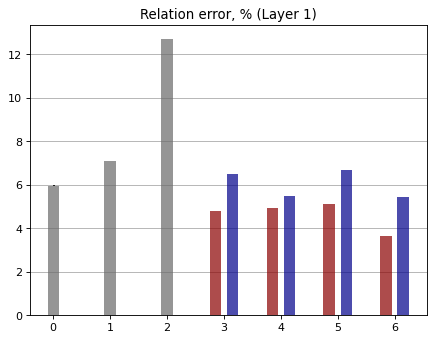

In [118]:
#!/usr/bin/env python3
# vim: set ai et ts=4 sw=4:

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime as dt
import csv

data_names = ['G', 'M', 'MT', 'G+M', 'G+MT', 'M+MT', 'G_M_MT']
data_values = [G_rel_error*100, M_rel_error*100, MT_rel_error*100, 
               G_M_rel_error*100, G_MT_rel_error*100, M_MT_rel_error*100, G_M_MT_rel_error*100,
               G_M_stack_rel_error*100, G_MT_stack_rel_error*100, M_MT_stack_rel_error*100, G_M_MT_stack_rel_error*100]

dpi = 80
fig = plt.figure(dpi = dpi, figsize = (512 / dpi, 384 / dpi) )
mpl.rcParams.update({'font.size': 10})

plt.title('Relation error, % (Layer 1)')

ax = plt.axes()
ax.yaxis.grid(True, zorder = 1)

#xs_1 = range(3)
xs_1_G = range(1)
xs_1 = range(2)
xs_2 = range(4)
xs_3 = range(4)


plt.bar([x + 0.01 for x in xs_1_G], [ d * 0.9 for d in data_values[:1]],
        width = 0.2, color = 'dimgray', alpha = 0.7, label = 'Initial solution',
        yerr = MT_st_dev * 100 ,zorder = 2)
plt.bar([x + 1.0 for x in xs_1], [ d * 0.9 for d in data_values[1:3]],
        width = 0.2, color = 'dimgray', alpha = 0.7, label = 'Initial solution',
        zorder = 2)
plt.bar([x + 2.85 for x in xs_2], data_values[3:7],
        width = 0.2, color = 'darkred', alpha = 0.7, label = 'Data integration',
        zorder = 2)
plt.bar([x + 3.15 for x in xs_3], data_values[7:11],
        width = 0.2, color = 'darkblue', alpha = 0.7, label = 'Stacking',
        zorder = 2)

plt.xticks(xs, data_names)

fig.autofmt_xdate(rotation = 25)

plt.legend(loc='best')
fig.savefig('bars.png')